In [1]:
from EarthquakeSignal import config, EarthquakeBatchProcessor


In [2]:
# pip list

### Set config manual 

In [3]:
config = {
    'file_extension': '.AT2',
    'unit_factor': 1,
    
    'apply_baseline_correction': True,
    'apply_arias_analysis': True,
    'apply_fourier_analysis': True,
    '_compute_newmark_spectra': True,
    'compute_rotd': False,
    'print_summary': True,
    
    'plot_signals': True,
    'plot_corrected_signals': False,
    'plot_arias_signals': True,
    'plot_fourier_signals': True,  
    'plot_newmark_spectra': True,
    'plot_rotd': False,
    
    'writer': True, 
}


In [4]:
registers_path = r'data\AT2'



📌 Earthquake ID: RSN1231
Sampling interval (dt): 0.005000 s
Number of samples: 18000
Total duration: 90.00 s
Component information:
  - H1: file='RSN1231_CHICHI_CHY080-N', RMS=7.0798e-02
  - H2: file='RSN1231_CHICHI_CHY080-E', RMS=8.1850e-02
  - V: file='RSN1231_CHICHI_CHY080-V', RMS=3.7464e-02



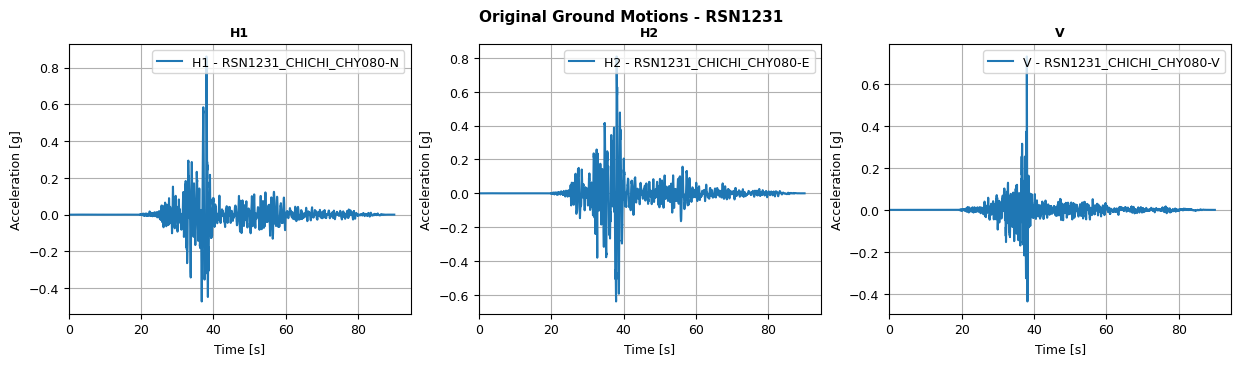

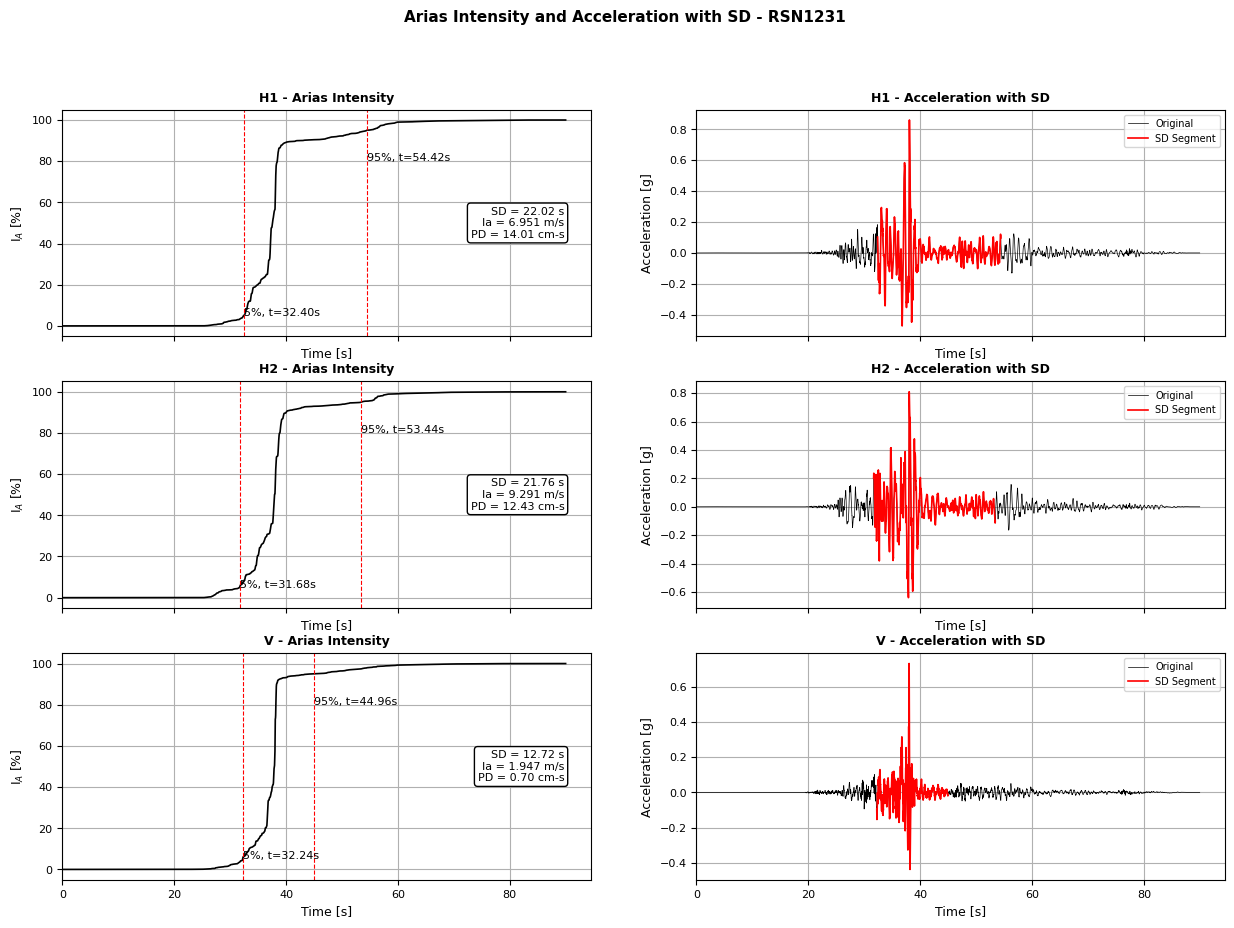

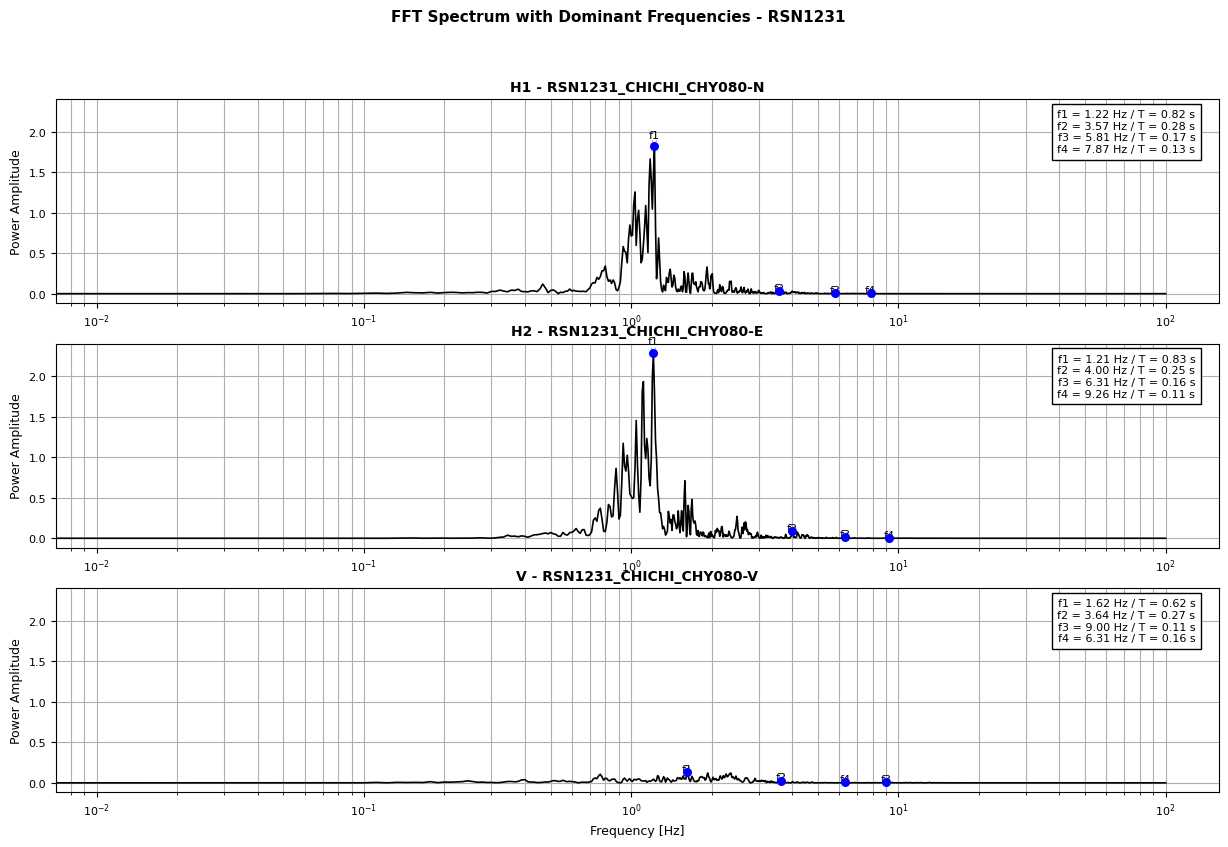

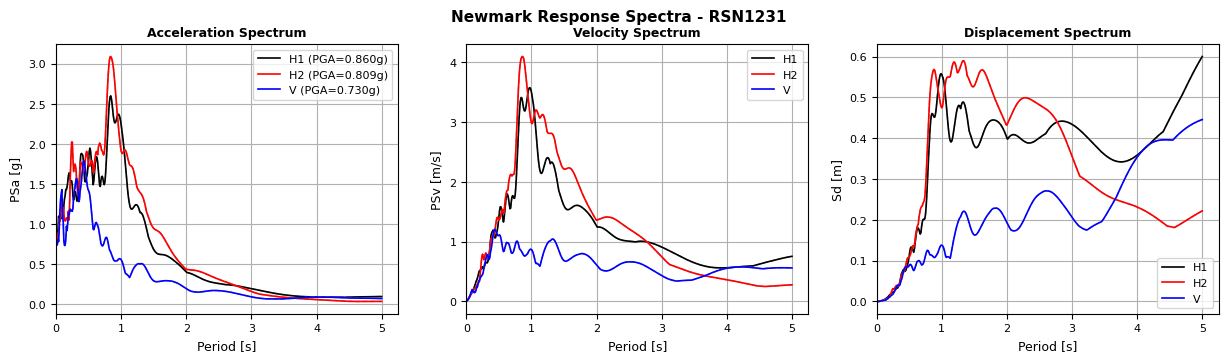

[WARNING] Signal 'RSN160_IMPVALL.H_H-BCR140.AT2' was padded with zeros to reach 7563 samples.
[WARNING] Signal 'RSN160_IMPVALL.H_H-BCR230.AT2' was padded with zeros to reach 7563 samples.

📌 Earthquake ID: RSN160
Sampling interval (dt): 0.005000 s
Number of samples: 7563
Total duration: 37.81 s
Component information:
  - H1: file='RSN160_IMPVALL.H_H-BCR140', RMS=8.2725e-02
  - H2: file='RSN160_IMPVALL.H_H-BCR230', RMS=1.0198e-01
  - V: file='RSN160_IMPVALL.H_H-BCR-UP', RMS=4.6589e-02



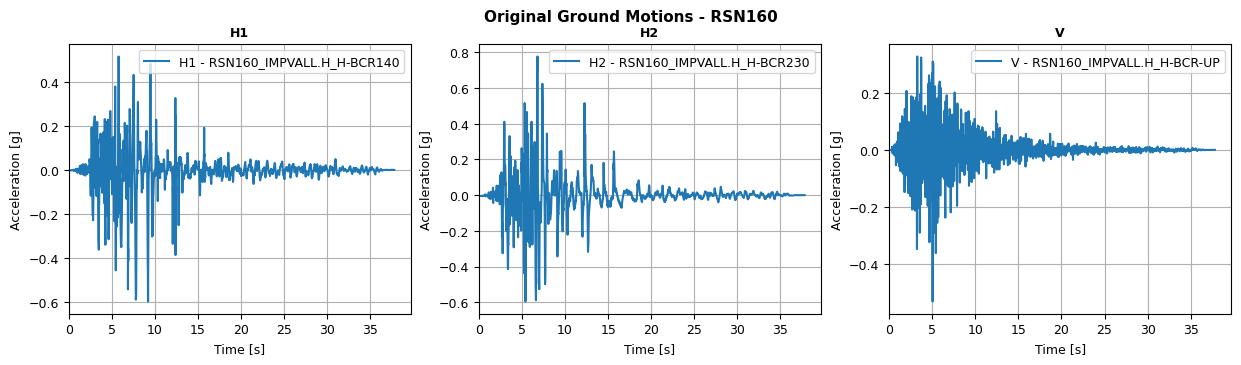

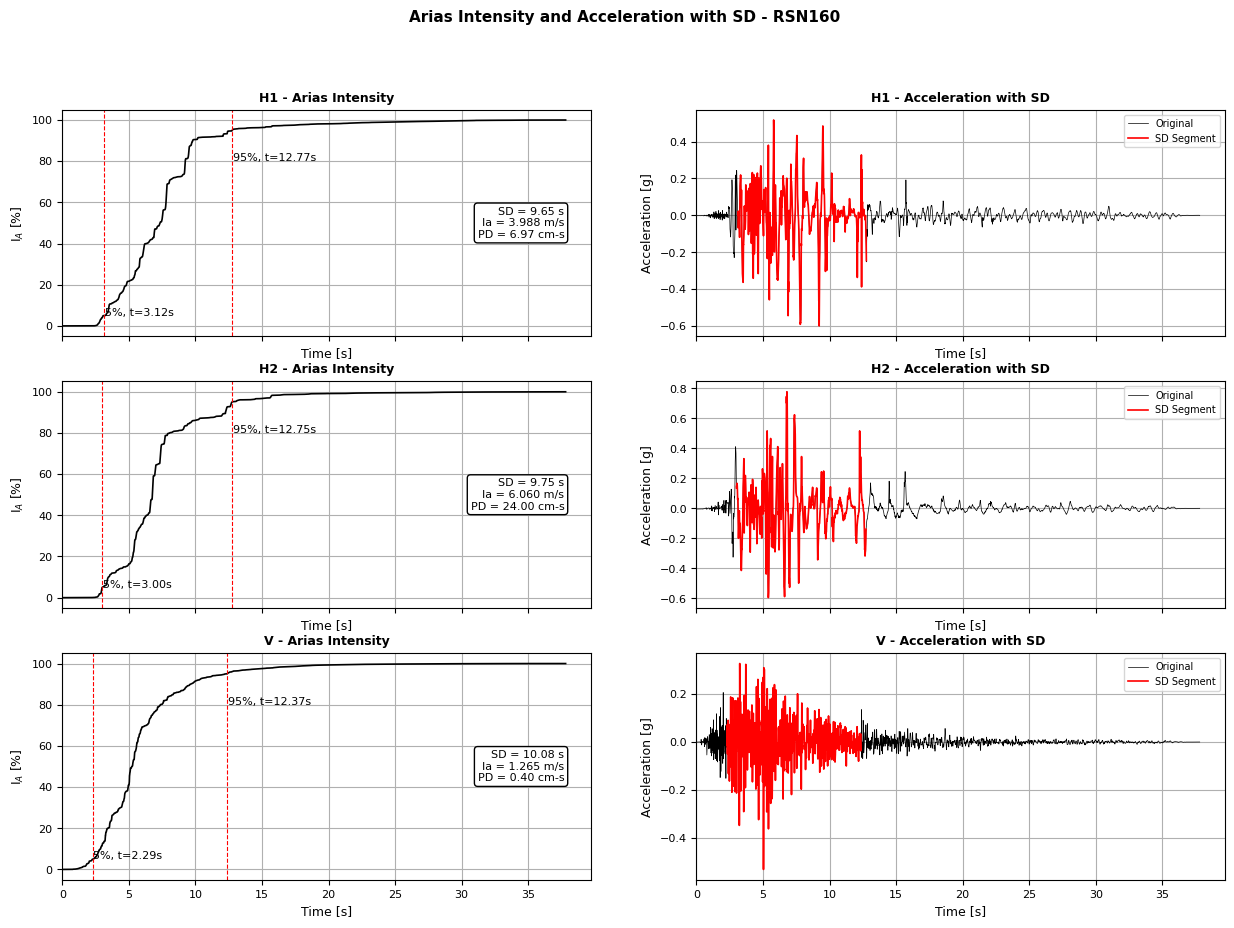

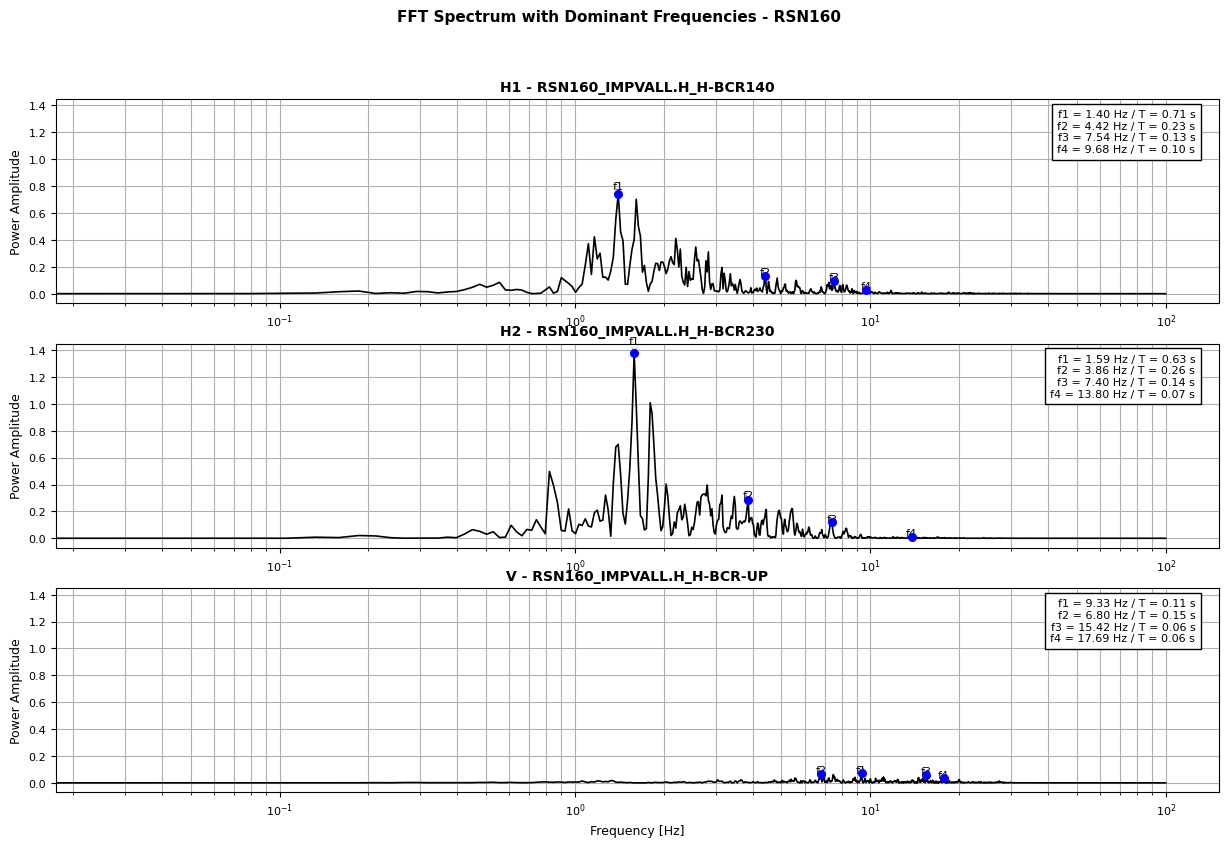

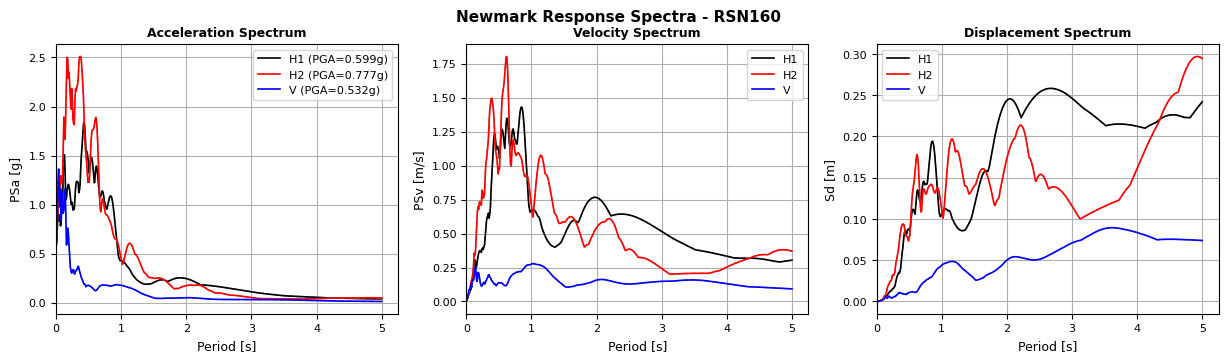


📌 Earthquake ID: RSN4116
Sampling interval (dt): 0.005000 s
Number of samples: 4203
Total duration: 21.02 s
Component information:
  - H1: file='RSN4116_PARK2004_Z14360', RMS=9.2483e-02
  - H2: file='RSN4116_PARK2004_Z14090', RMS=1.5396e-01
  - V: file='RSN4116_PARK2004_Z14-UP', RMS=5.9515e-02



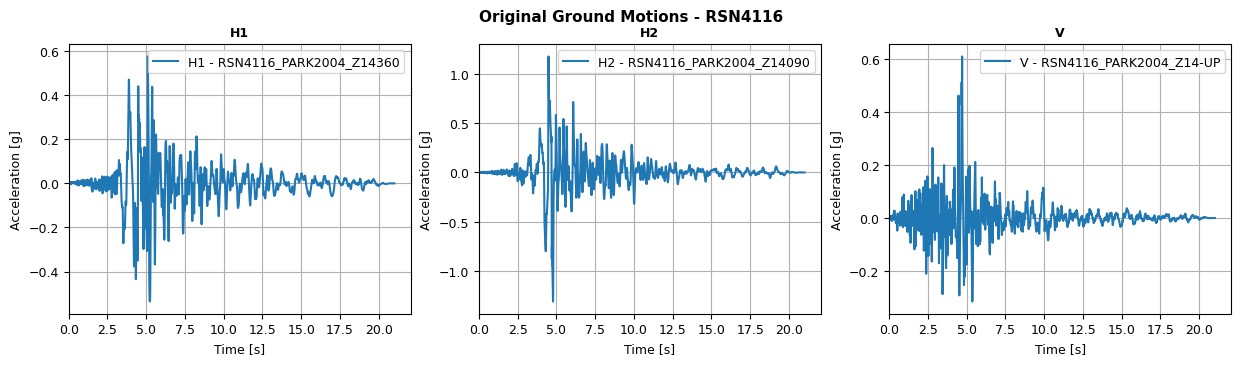

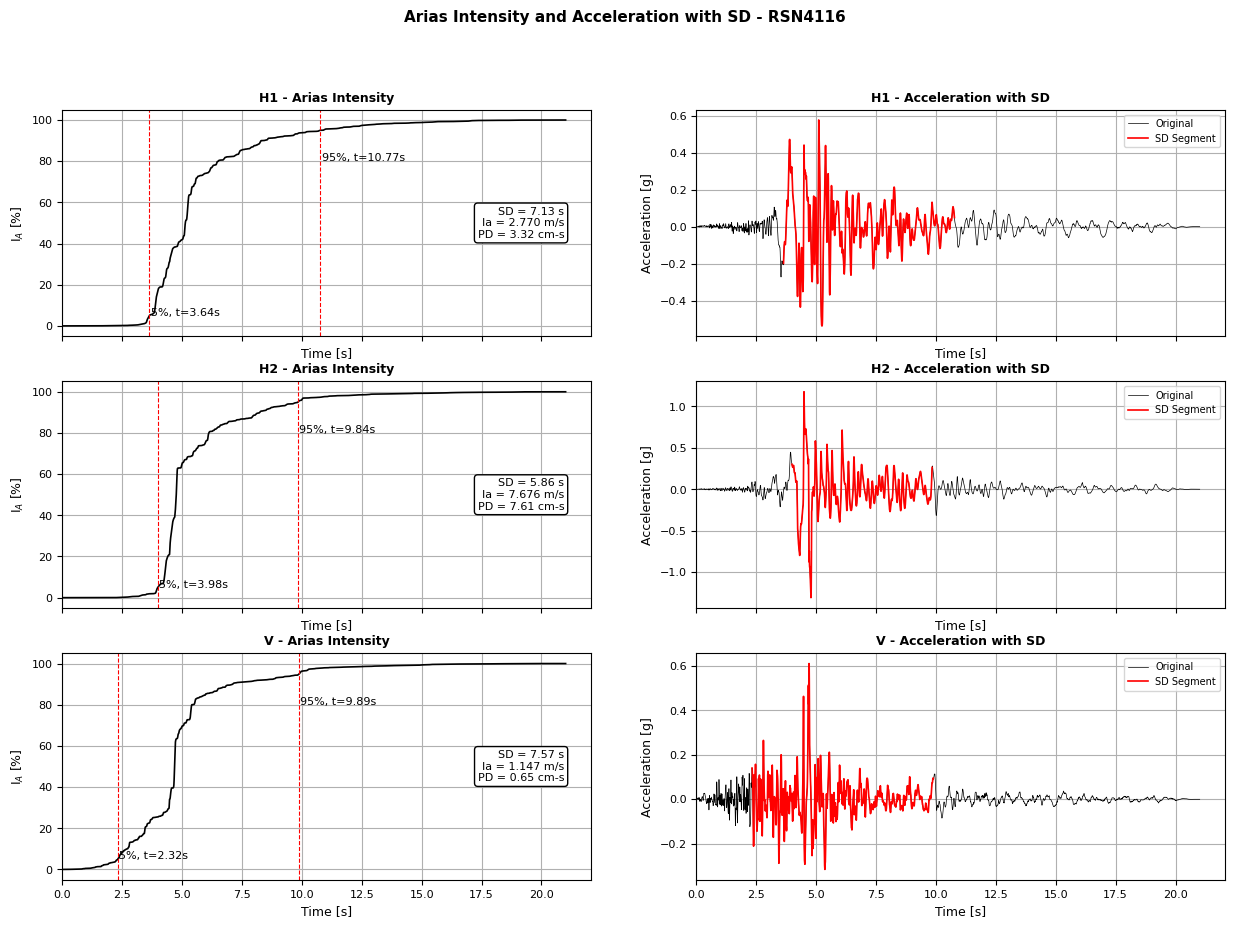

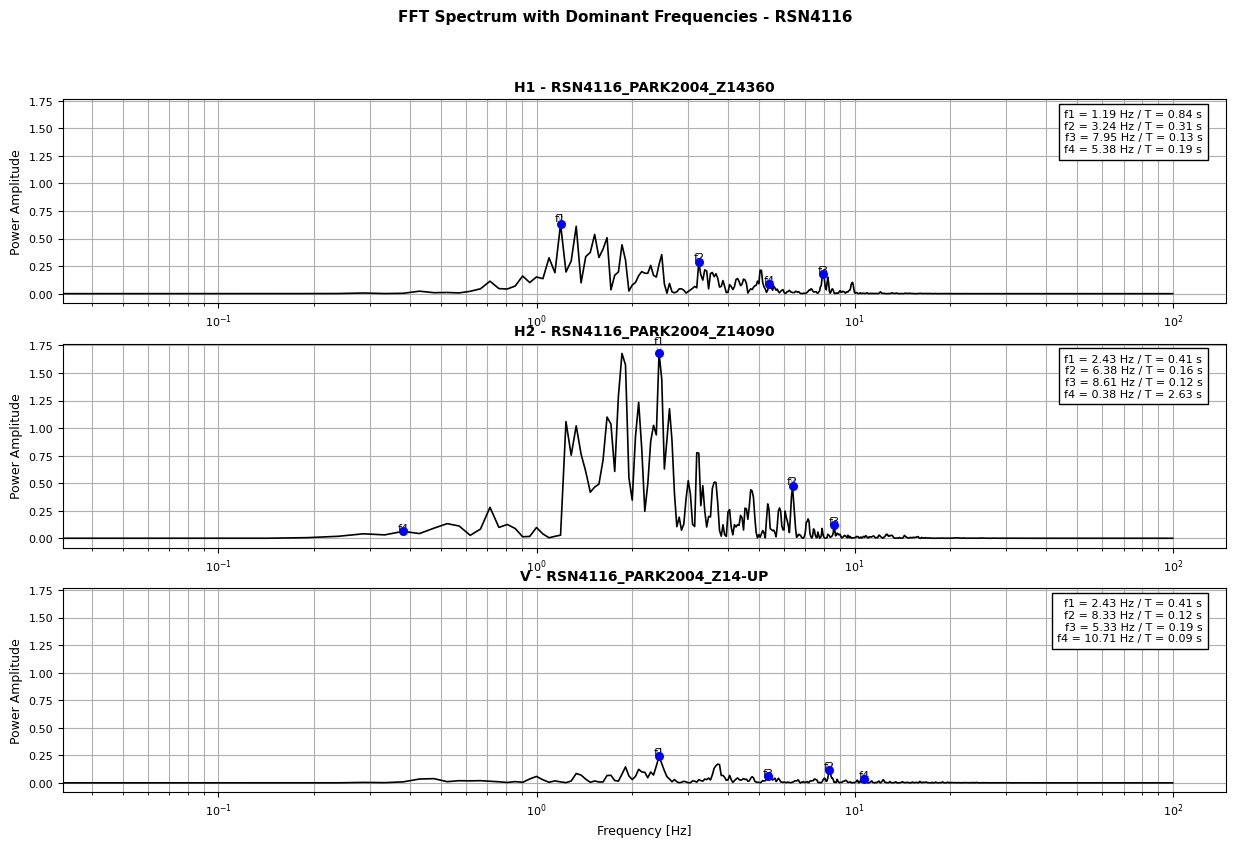

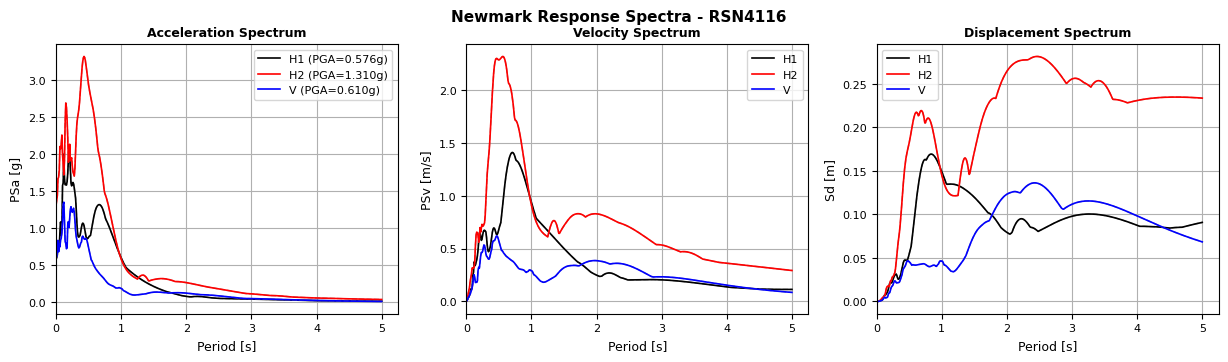


📌 Earthquake ID: RSN779
Sampling interval (dt): 0.005000 s
Number of samples: 5001
Total duration: 25.00 s
Component information:
  - H1: file='RSN779_LOMAP_LGP090', RMS=8.9751e-02
  - H2: file='RSN779_LOMAP_LGP000', RMS=1.4331e-01
  - V: file='RSN779_LOMAP_LGP-UP', RMS=8.2138e-02



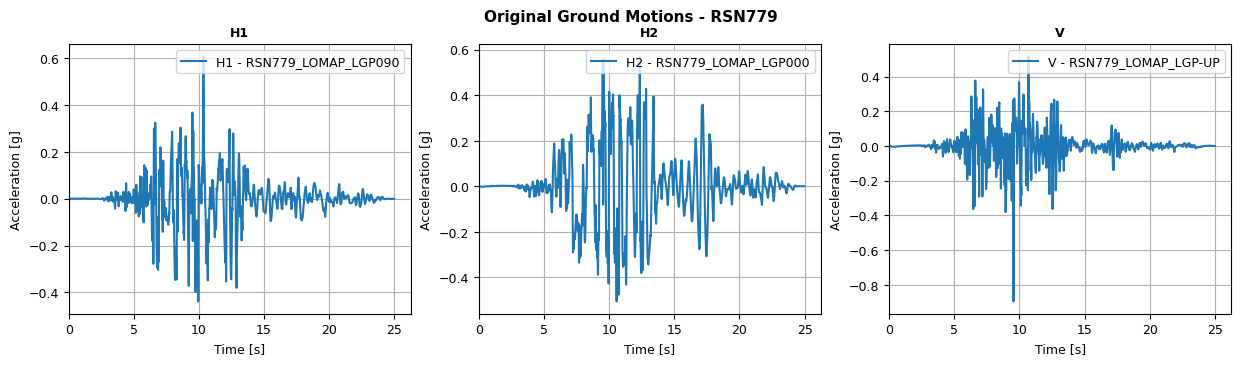

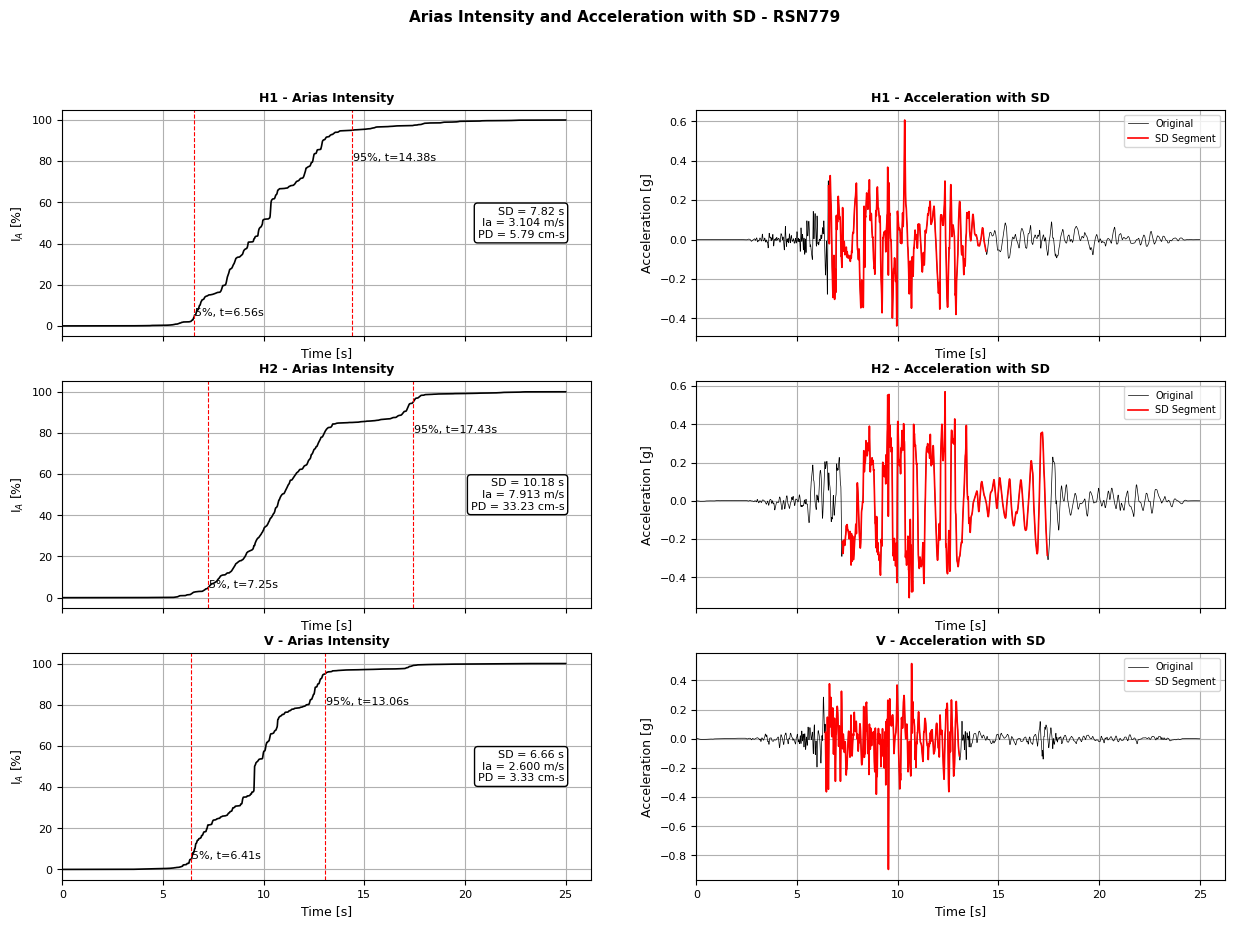

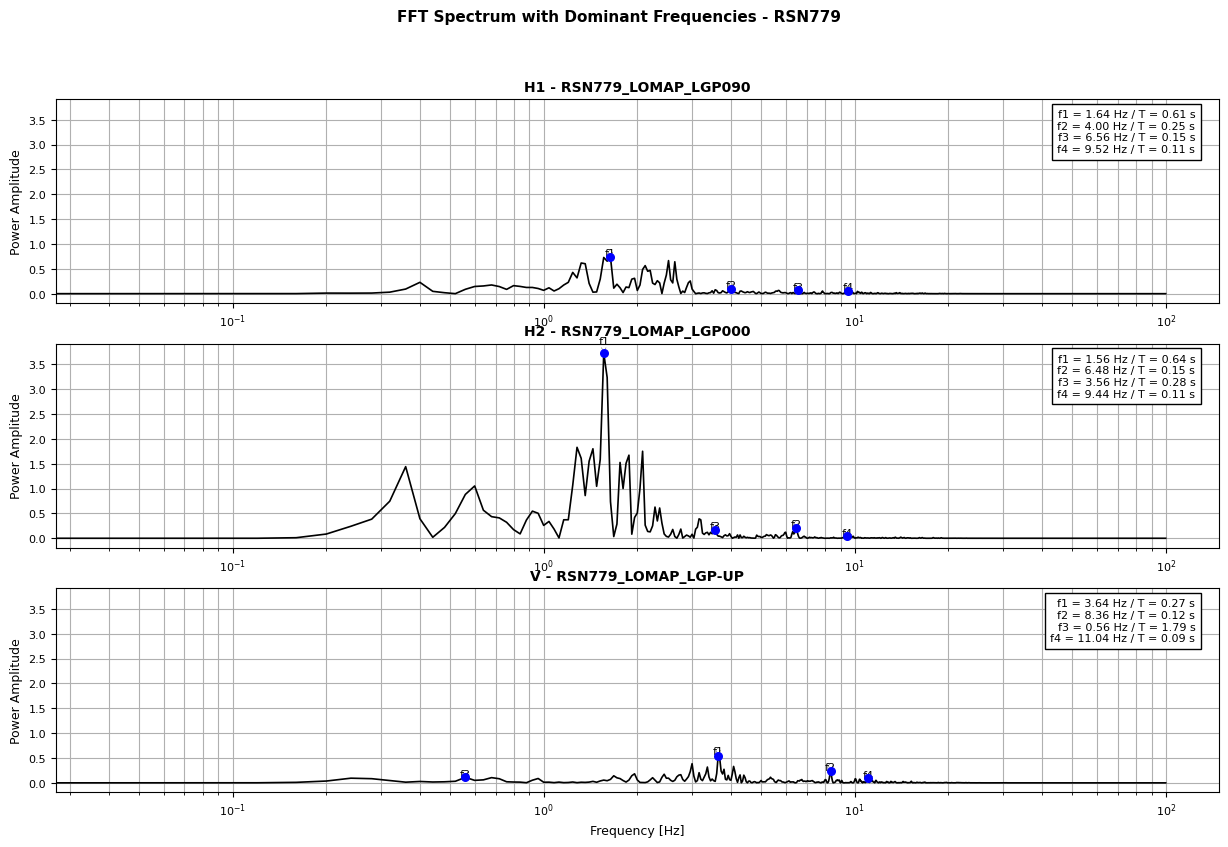

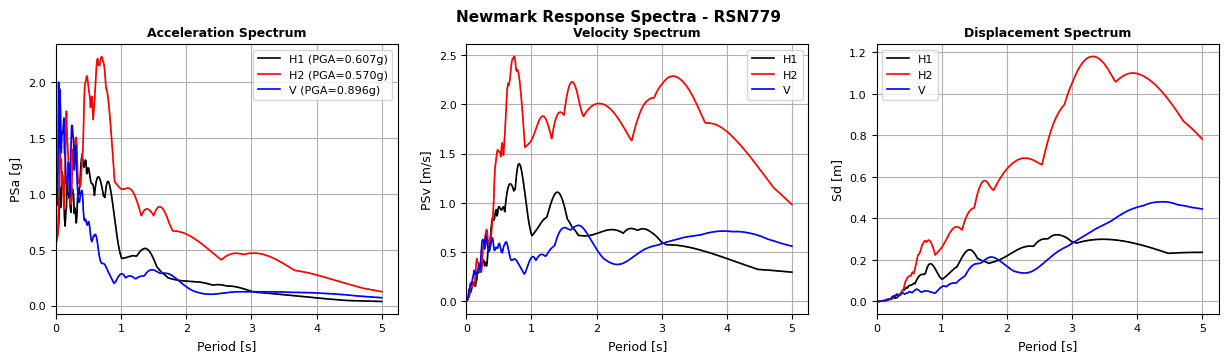


📌 Earthquake ID: RSN983
Sampling interval (dt): 0.005000 s
Number of samples: 5727
Total duration: 28.64 s
Component information:
  - H1: file='RSN983_NORTHR_JGB022', RMS=8.5711e-02
  - H2: file='RSN983_NORTHR_JGB292', RMS=1.2156e-01
  - V: file='RSN983_NORTHR_JGB-UP', RMS=8.2102e-02



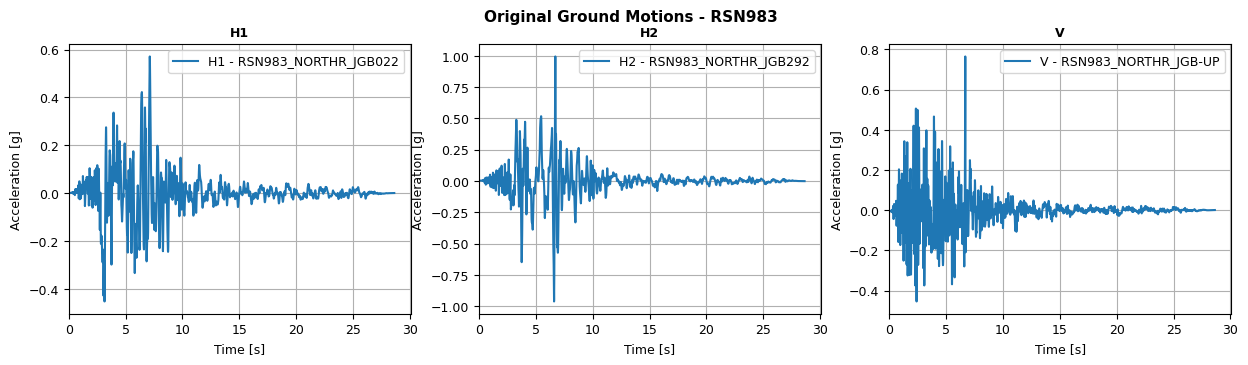

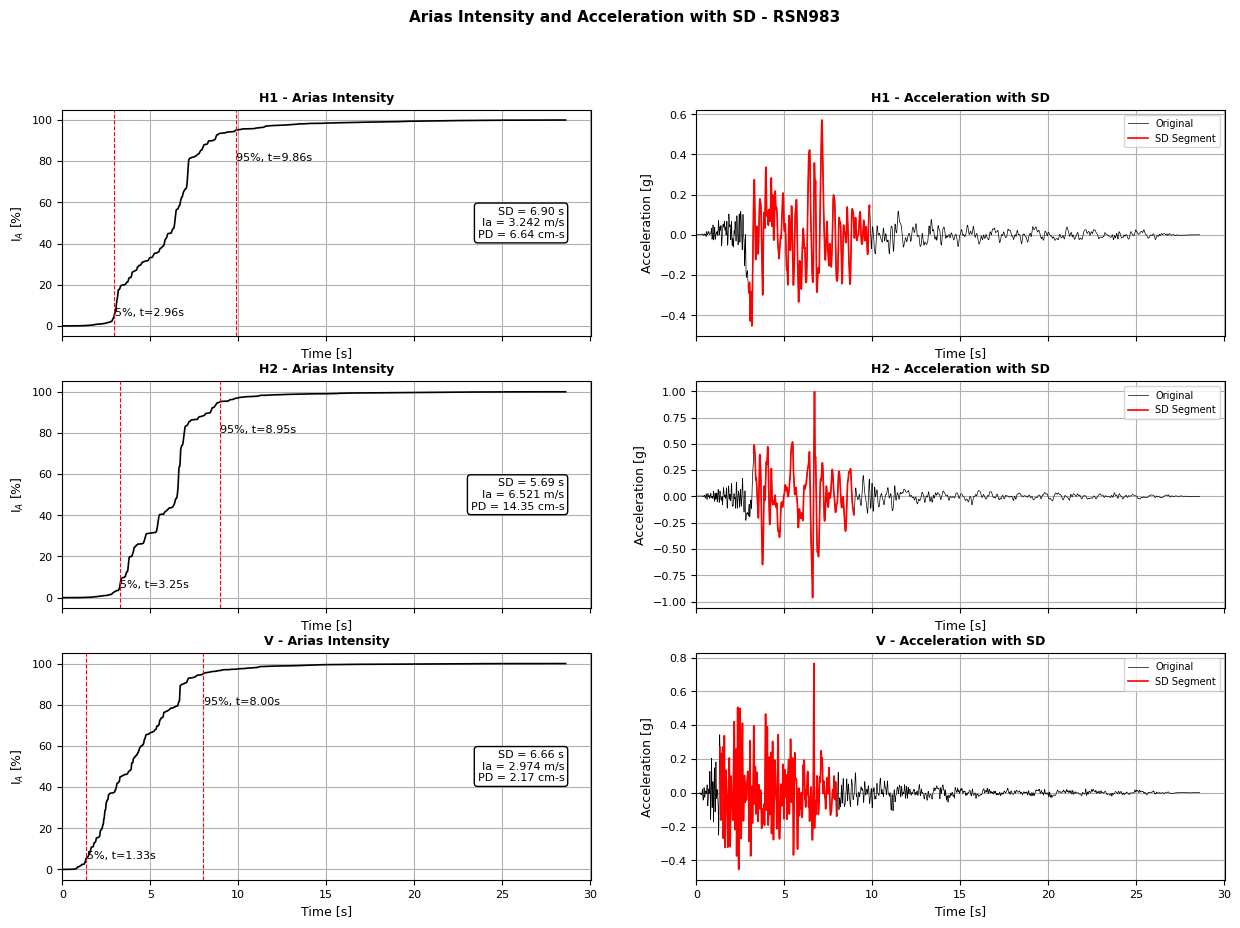

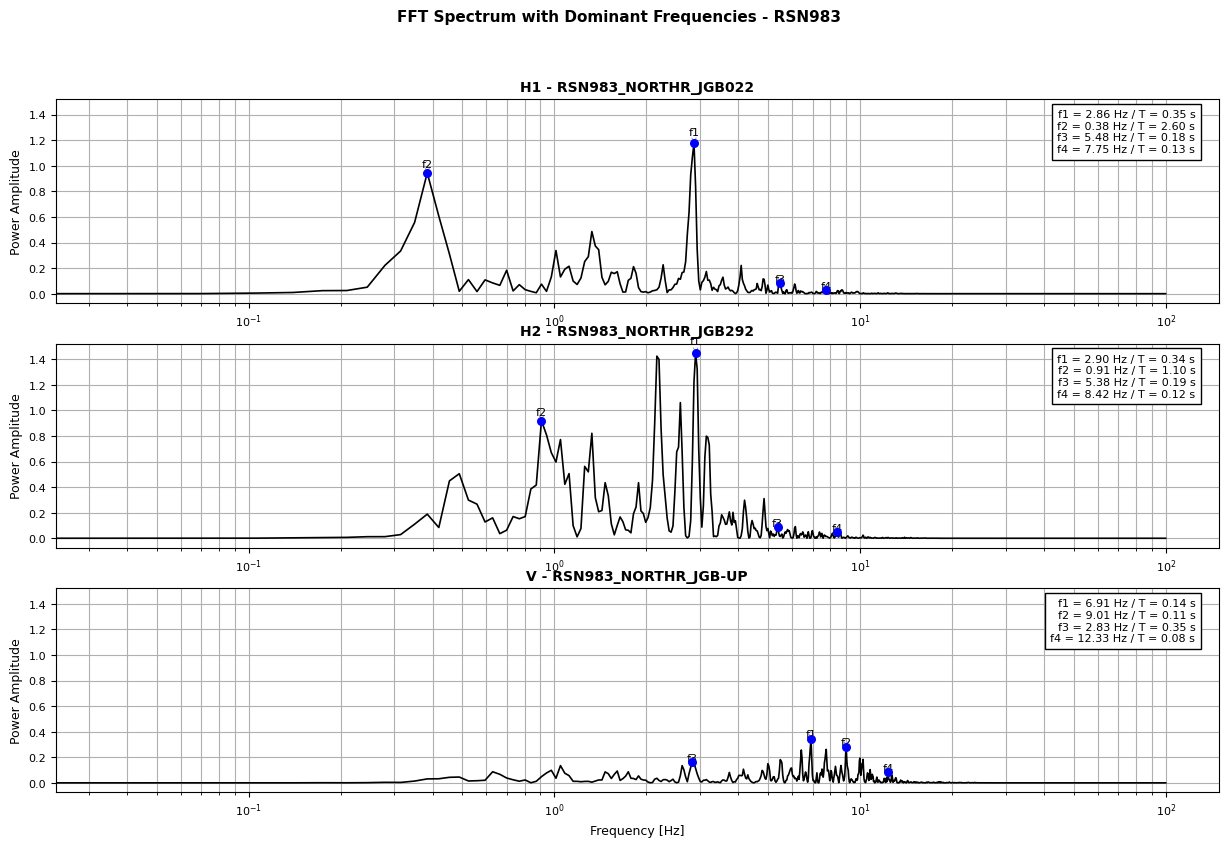

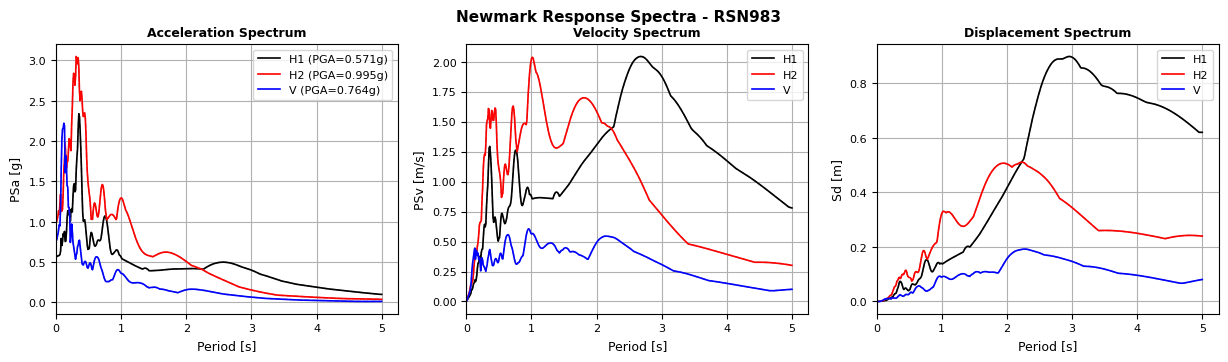

In [5]:
processor = EarthquakeBatchProcessor(registers_path, config)
earthquake = processor.process_all()


### For each earthquake

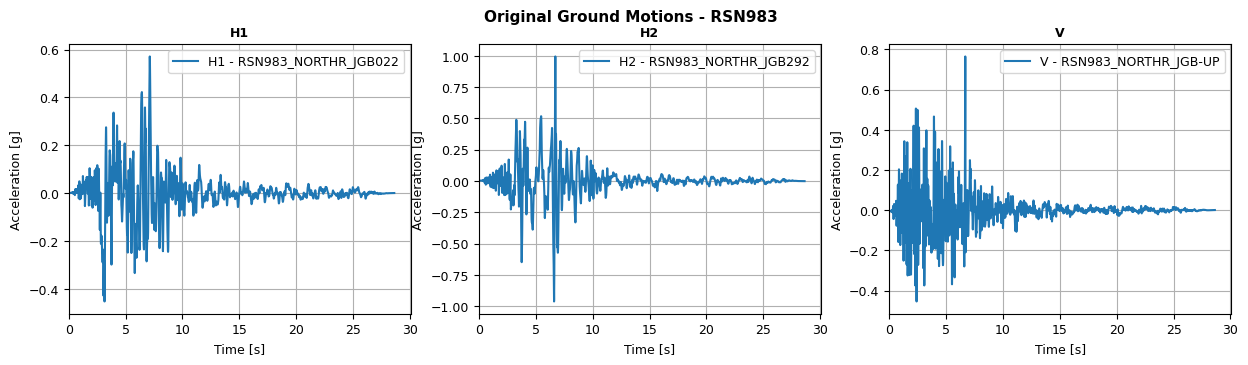

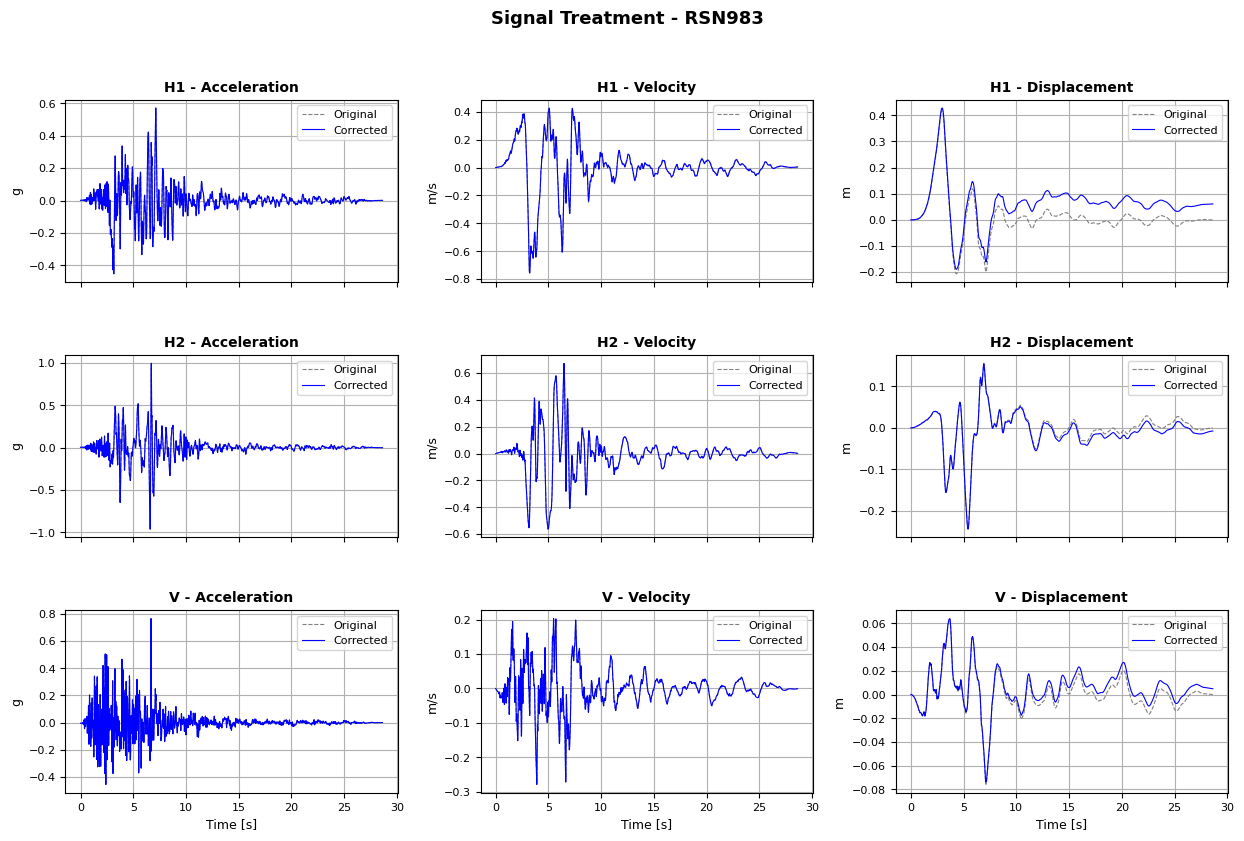

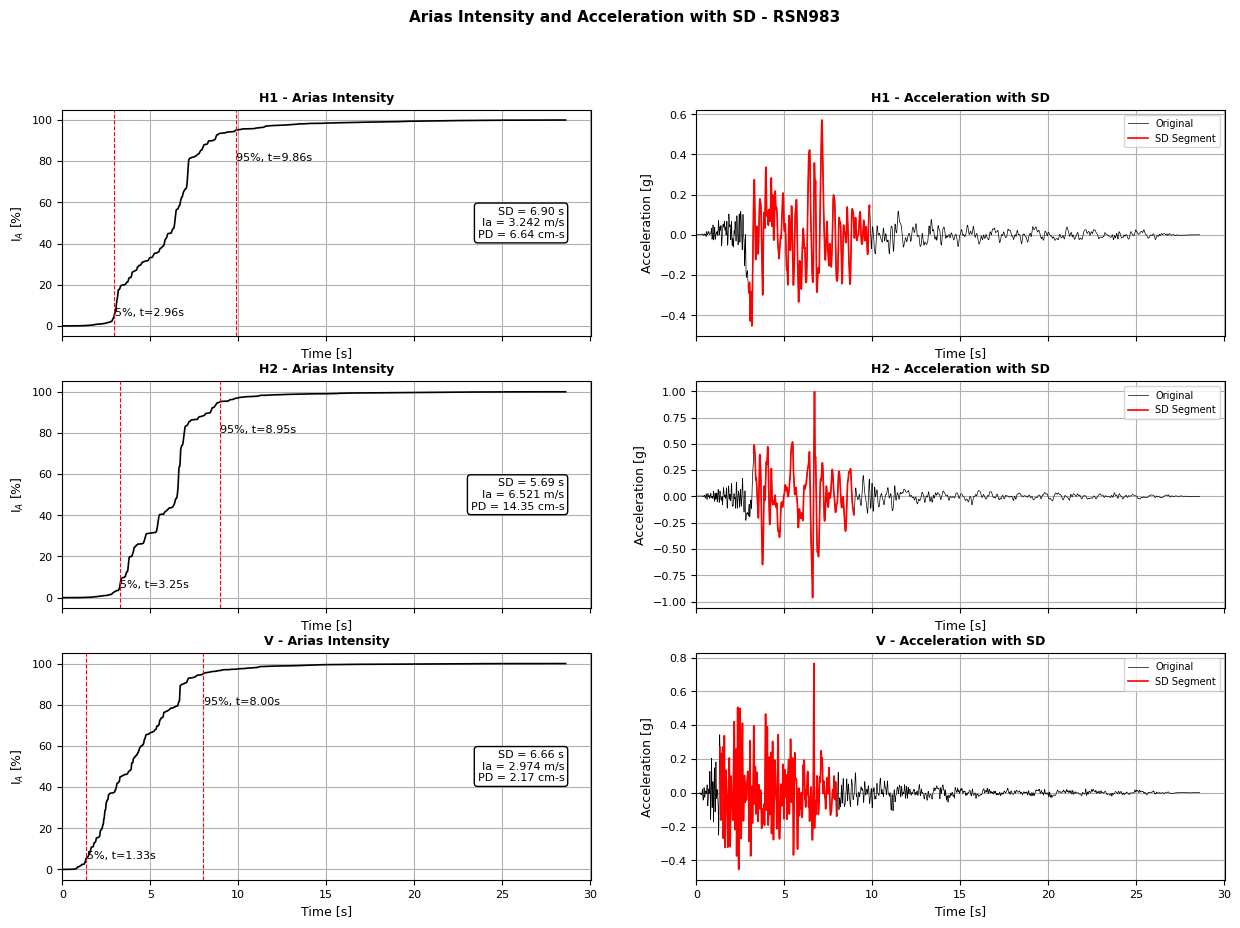

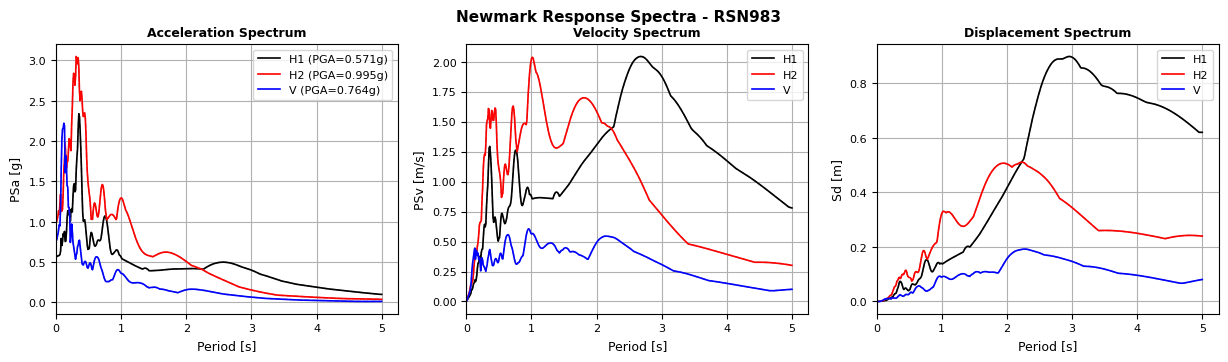

In [6]:
# earthquake['RSN1'].print_summary()
earthquake['RSN983'].plot_original_signals()
earthquake['RSN983'].plot_corrected_signals()
earthquake['RSN983'].plot_arias_signals()
# earthquake['RSN1'].plot_fourier_signals()
earthquake['RSN983'].plot_newmark_spectra()


In [7]:
# record = earthquake['RSN1']


# print("🔹 Arias Intensity")
# print(f"Significant Duration Start  : {record.arias['H1']['t_start']:.3f} s")
# print(f"Significant Duration End    : {record.arias['H1']['t_end']:.3f} s")
# print(f"Total Arias Intensity       : {record.arias['H1']['IA_total']:.5f} m/s")
# print(f"Destructive Potential Index : {record.arias['H1']['pot_dest']:.5f}")


# print("\n🔹 Fourier Analysis")
# print("Dominant Periods (s):", record.fourier['H1']['dominant_periods'])

## Keys and Methods

In [8]:

first_key = next(iter(earthquake))
eq = earthquake[first_key]

print("Keys:")
for key in vars(eq):
    print(f"  - {key}")

print("\nMethods:")
import inspect
methods = [name for name, obj in inspect.getmembers(eq, inspect.ismethod) if not name.startswith('_')]
for m in methods:
    print(f"  - {m}()")

Keys:
  - filepath
  - config
  - name
  - dt
  - signals
  - component_names
  - corrected_acc
  - corrected_vel
  - corrected_disp
  - arias
  - newmark_spectra
  - rotd
  - fourier
  - summary_tool
  - plotter_tool
  - comparison_tool
  - arias_plotter
  - fourier_plotter
  - newmark_plotter
  - rotd_plotter
  - exporter
  - signals_raw

Methods:
  - export()
  - load_and_process()
  - plot_arias_signals()
  - plot_corrected_signals()
  - plot_fourier_signals()
  - plot_newmark_spectra()
  - plot_original_signals()
  - plot_rotd()
  - print_summary()


### All spectra

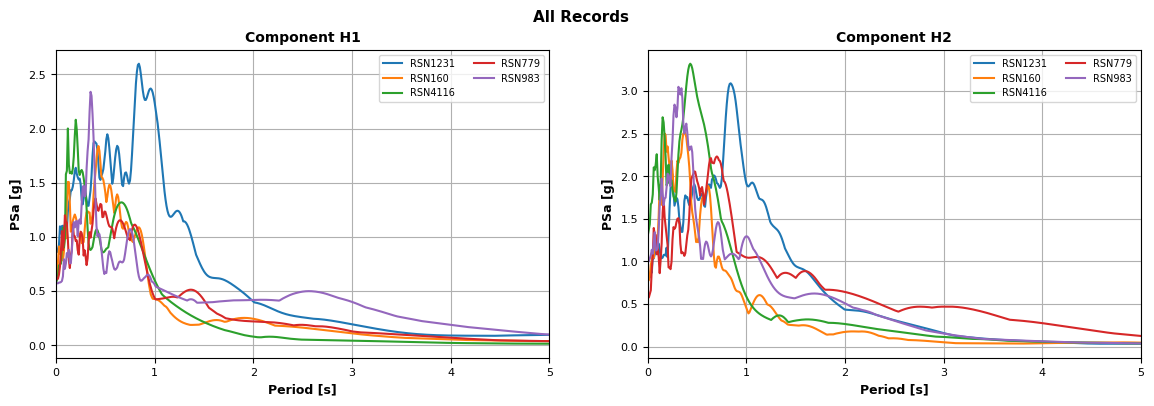

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Calcular ruta correcta ---
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))
output_dir = os.path.join(project_root, 'outputs')
os.makedirs(output_dir, exist_ok=True)
svg_path = os.path.join(output_dir, "all _records_AT2.svg")

# --- Graficar espectros ---
plt.figure(figsize=(14, 4))

# Subplot para H1
plt.subplot(1, 2, 1)
for rsn, eq in earthquake.items():
    try:
        T_H1 = eq.newmark_spectra['H1']['T']
        PSa_H1 = eq.newmark_spectra['H1']['PSa']
        plt.plot(T_H1, PSa_H1, linewidth=1.5, label=f"{rsn}")
    except KeyError:
        print(f"Warning: {rsn} missing H1 spectrum")

plt.title("Component H1", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0, right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)

# Subplot para H2
plt.subplot(1, 2, 2)
for rsn, eq in earthquake.items():
    try:
        T_H2 = eq.newmark_spectra['H2']['T']
        PSa_H2 = eq.newmark_spectra['H2']['PSa']
        plt.plot(T_H2, PSa_H2, linewidth=1.5, label=f"{rsn}")
    except KeyError:
        print(f"Warning: {rsn} missing H2 spectrum")

plt.title("Component H2", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0, right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)

plt.suptitle("All Records", fontsize=11, fontweight='bold')

# --- Guardar como SVG en outputs/
plt.savefig(svg_path, format='svg')
plt.show()




### Rotd100

C:\Users\ppala\AppData\Local\Temp\ipykernel_34156\2255782939.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=7, loc='upper right', ncol=2)


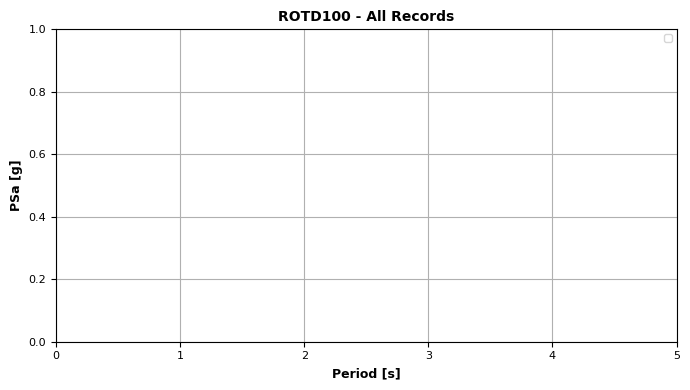

In [10]:


# Create figure with 1 row and 1 column
plt.figure(figsize=(7, 4))

# Subplot for ROTD100
plt.subplot(1, 1, 1)
for rsn, eq in earthquake.items():
    try:

        T = eq.rotd['T']
        PSa_rotd100 = eq.rotd['ROTD100']
        pga = round(PSa_rotd100[0], 3)
        plt.plot(T, PSa_rotd100, linewidth=1.5, label=f"{rsn} -PGA:{pga} g")
    except KeyError:
        print(f"Warning: {rsn} missing ROTD100 spectrum")

plt.title("ROTD100 - All Records", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0, right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)
plt.tight_layout()
plt.show()
